In [233]:
import numpy as np
from matplotlib import pyplot
from matplotlib import rc
import pandas 
import csv
import re

# Part 1: Creating a Usable Data Sheet

In [234]:
beef = pandas.read_csv("beef_consumption.csv")

In [235]:
beef.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000004,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.808401,NaN
2,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1992,26.278166,NaN
3,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1993,26.244478,NaN
4,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1994,25.541244,NaN


In [236]:
beef = beef[beef["LOCATION"] == "USA"]

In [237]:
beef = beef.drop(beef[beef["LOCATION"] != "USA"].index)
beef.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1064,USA,MEATCONSUMP,BEEF,KG_CAP,A,1990,30.622892,NaN
1065,USA,MEATCONSUMP,BEEF,KG_CAP,A,1991,30.407840,NaN
1066,USA,MEATCONSUMP,BEEF,KG_CAP,A,1992,30.304769,NaN
1067,USA,MEATCONSUMP,BEEF,KG_CAP,A,1993,29.662651,NaN
1068,USA,MEATCONSUMP,BEEF,KG_CAP,A,1994,30.712981,NaN


In [238]:
#change the indices to 0...304 so the data is easier to work with 
beef.index = (range(304))
beef.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,MEATCONSUMP,BEEF,KG_CAP,A,1990,30.622892,NaN
1,USA,MEATCONSUMP,BEEF,KG_CAP,A,1991,30.407840,NaN
2,USA,MEATCONSUMP,BEEF,KG_CAP,A,1992,30.304769,NaN
3,USA,MEATCONSUMP,BEEF,KG_CAP,A,1993,29.662651,NaN
4,USA,MEATCONSUMP,BEEF,KG_CAP,A,1994,30.712981,NaN


In [239]:
#make a dictionary to prime initial data frame
consumptions = {"YEAR": "MEAT_CONSUMPTION"}
many = 0
num=0
num2 = 0
for year in range(1990, 2018):
    total_consumption = 0
    for row in beef.iterrows():
        if row[1]["TIME"] == year:
            #add all the rows that are red meat (i.e. not poultry)
            if row[1]["SUBJECT"] != "POULTRY":
                total_consumption += row[1]["Value"]
                many += 1
    consumptions[year] = total_consumption

print(consumptions)

{'YEAR': 'MEAT_CONSUMPTION', 1990: 18552.806668327, 1991: 18748.509917597, 1992: 19304.043366862, 1993: 19146.341666006, 1994: 19827.407065392, 1995: 19997.607655243002, 1996: 19725.521449893997, 1997: 19600.964680809, 1998: 20574.371614042, 1999: 21140.006087544, 2000: 21174.362860022004, 2001: 20959.657274779, 2002: 21650.768080754002, 2003: 21375.014190422, 2004: 21707.119284484, 2005: 21548.133495469003, 2006: 21689.511703818, 2007: 22035.971969776, 2008: 21468.83518795, 2009: 21471.74453362, 2010: 20882.478920452, 2011: 20203.966679572, 2012: 20293.590584896003, 2013: 20439.815412947, 2014: 20058.075785891, 2015: 20820.416990731002, 2016: 21359.351211834, 2017: 21834.917663095002}


In [240]:
#MAKING THE DATAFRAME
#write a csv file containing the initial data. 
with open("meat_project.csv", "w+") as meat: 
    writer = csv.writer(meat)
    for key, value in consumptions.items():
        writer.writerow([key, value])

meat.close()

In [241]:
meat_project = pandas.read_csv("meat_project.csv")

## GDP Data: Clean-Up

In [242]:
gdp = pandas.read_csv("GDP.csv")

In [243]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.939270,23512.602600,24984.279450,24709.602260,25018.308950,25528.403780,25796.380250,25251.639680,25655.102020,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,444.184404,550.514974,599.297630,648.511070,647.966461,625.339539,590.076474,549.582760,550.068459,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3117.896944,3585.905553,4615.867475,5102.489969,5258.407376,5412.692348,4170.730358,3509.604211,4100.289786,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.134899,4094.360204,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4131.872341,4537.579056,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43339.379870,39736.354060,41098.766940,38391.080870,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840,NaN


In [244]:
#rename the columns so there arent spaces 
gdp = gdp.rename(columns=dict(zip(gdp.keys(), [s.replace(" ", "_") for s in gdp.keys()])))

In [245]:
gdp.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24630.939270,23512.602600,24984.279450,24709.602260,25018.308950,25528.403780,25796.380250,25251.639680,25655.102020,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,444.184404,550.514974,599.297630,648.511070,647.966461,625.339539,590.076474,549.582760,550.068459,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3117.896944,3585.905553,4615.867475,5102.489969,5258.407376,5412.692348,4170.730358,3509.604211,4100.289786,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.134899,4094.360204,4437.177794,4247.614342,4413.082887,4578.667934,3952.830781,4131.872341,4537.579056,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43339.379870,39736.354060,41098.766940,38391.080870,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840,NaN


In [246]:
#find just the ones with the country code of USA
USA_GDP = gdp[gdp["Country_Code"] == "USA" ]
USA_GDP.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
249,United States,USA,GDP per capita (current US$),NY.GDP.PCAP.CD,3007.123445,3066.562869,3243.843078,3374.515171,3573.941185,3827.52711,...,47001.55535,48375.40695,49793.71352,51450.95911,52782.08651,54696.72617,56443.81724,57588.53807,59531.66196,NaN


In [247]:
#make gdp a float and get correct years
add_gdp = []
for i in USA_GDP.iloc[0,-29:-1]:
    i = float(i)
    add_gdp.append(i)
print(add_gdp)

[23954.47935, 24405.16481, 25492.95165, 26464.85251, 27776.63553, 28782.17502, 30068.230919999998, 31572.69023, 32949.19776, 34620.9289, 36449.85512, 37273.6181, 38166.03784, 39677.19835, 41921.809760000004, 44307.92058, 46437.06712, 48061.53766, 48401.427339999995, 47001.55535, 48375.40695, 49793.71352, 51450.95911, 52782.08651, 54696.72617, 56443.81724, 57588.53807, 59531.661960000005]


In [248]:
meat_project["GDP"] = add_gdp

In [249]:
meat_project.head()

,YEAR,MEAT_CONSUMPTION,GDP
0,1990,18552.806668,23954.47935
1,1991,18748.509918,24405.16481
2,1992,19304.043367,25492.95165
3,1993,19146.341666,26464.85251
4,1994,19827.407065,27776.63553


## Agricultural Support Data (TSE): Clean-Up

In [250]:
agsupport = pandas.read_csv("agricultureTSE.csv")

In [251]:
agsupport.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,USA,AGRSUPP,TSE,MLN_USD,A,1990,36573.005997,NaN
1,USA,AGRSUPP,TSE,MLN_USD,A,1991,38822.071139,NaN
2,USA,AGRSUPP,TSE,MLN_USD,A,1992,39312.212831,NaN
3,USA,AGRSUPP,TSE,MLN_USD,A,1993,46452.267147,NaN
4,USA,AGRSUPP,TSE,MLN_USD,A,1994,41655.793696,NaN


In [252]:
#add the correct years of TSE to the dataset
add_tse = []
for row in agsupport.iterrows():
    add = row[1]["Value"]
    add = float(add)
    add_tse.append(add)
add_tse.append("")
meat_project["TSE"] = add_tse

## Unemployment Data: Clean-Up

In [253]:
unemployment = pandas.read_csv("unemployment.csv")

In [254]:
#get rid of spaces in unemployment field names 
unemployment = unemployment.rename(columns=dict(zip(unemployment.keys(), [s.replace(" ", "_") for s in unemployment.keys()])))

In [255]:
unemployment.head()

,Country_Name,Country_Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed:_31
0,Aruba,ABW,NaN,6.08,NaN,NaN,6.45,NaN,NaN,7.45,...,10.600,8.9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.6919,NaN,NaN,NaN,NaN,11.1836,NaN,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.430,NaN,NaN,NaN,24.219999,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,9.5,9.10,26.5,22.299999,18.40,12.9,12.3,14.90,...,14.086,13.4809,13.3759,15.8659,17.490000,17.08,NaN,13.7500,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
#find unemployment data for only the USA 
unemployment = unemployment[unemployment["Country_Code"] == "USA" ]

In [257]:
unemployment.head()

,Country_Name,Country_Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed:_31
249,United States,USA,5.6,6.8,7.5,6.9,6.1187,5.6504,5.4511,5.0003,...,9.6334,8.9492,7.9013,7.3749,6.1675,5.28,4.8692,4.3552,3.8956,NaN


In [258]:
#add floats of correct years to dataset 
add_unemploy = []
for i in unemployment.iloc[0, 2:-2]:
    i = float(i)
    add_unemploy.append(i)
    
meat_project["UNEMPLOYMENT_RATE"] = add_unemploy

In [259]:
meat_project.head()

,YEAR,MEAT_CONSUMPTION,GDP,TSE,UNEMPLOYMENT_RATE
0,1990,18552.806668,23954.47935,36573,5.6000
1,1991,18748.509918,24405.16481,38822.1,6.8000
2,1992,19304.043367,25492.95165,39312.2,7.5000
3,1993,19146.341666,26464.85251,46452.3,6.9000
4,1994,19827.407065,27776.63553,41655.8,6.1187


## Price Stability Data: Clean-Up

In [260]:
inflation = pandas.read_csv("inflation.csv", encoding="latin-1")

In [261]:
#rename inflation field names so they don't have spaces 
inflation = inflation.rename(columns=dict(zip(inflation.keys(), [s.replace(" ", "_") for s in inflation.keys()])))

In [262]:
#find just the data for USA
inflation = inflation[inflation["Country_Code"] == "USA"]

In [263]:
inflation.head()

,Country_Name,Country_Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
249,United States,USA,5.397956,4.234964,3.02882,2.951657,2.607442,2.80542,2.931204,2.33769,...,-0.355546,1.640043,3.156842,2.069337,1.464833,1.622223,0.118627,1.261583,2.13011,NaN


In [264]:
#add floats of the right years of inflation data to overall dataset
add_inflation = []
for i in inflation.iloc[0, 2:-1]:
    i = float(i)
    add_inflation.append(i)

meat_project["INFLATION"] = add_inflation

## Vegan Popularity: Clean-Up

In [265]:
vegan = pandas.read_csv("vegan_trends.csv")

In [266]:
i = 0
for year in vegan["Month"]:
    #make a regular expression to get the correct year
    match = re.search("\d\d\d\d", year)
    year = match.group(0)
    #get the searches for that month
    vegan["Month"][i] = year
    i+=1

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [267]:
add_vegan = []
#add empty string for years when google analytics wasn't yet invented
add_vegan = [ "" for i in range(2005-1990)]

year = 0
#for year add the month data together and append that data to overall dataset 
for i in range(len(vegan["Month"])):
    if i == len(vegan["Month"])-1:
        year += int(vegan.iloc[i, 1])
    elif vegan["Month"][i+1] == vegan["Month"][i]:
        year += int(vegan.iloc[i, 1])
    else:
        add_vegan.append(float(year/12))
        year = 0

add_vegan = add_vegan[:-2]

meat_project["VEGAN_POPULARITY"] = add_vegan

## Vegetarian Popularity: Clean-Up

In [268]:
vegetarian = pandas.read_csv("vegetarian_trends.csv")

In [269]:
#vegetarian has same process as vegan 
i = 0
for year in vegetarian["Month"]:
    match = re.search("\d\d\d\d", year)
    year = match.group(0)
    vegetarian["Month"][i] = year
    i+=1

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [270]:
add_vegetarian = []
add_vegetarian = [ "" for i in range(2005-1990) ]

year = 0
for i in range(len(vegetarian["Month"])):
    if i == len(vegetarian["Month"])-1:
        year += int(vegetarian.iloc[i, 1])
    elif vegetarian["Month"][i+1] == vegetarian["Month"][i]:
        year += int(vegetarian.iloc[i, 1])
    else:
        add_vegetarian.append(float(year/12))
        year = 0

add_vegetarian = add_vegetarian[:-2]

meat_project["VEGETARIAN_TRENDS"] = add_vegetarian

## Keto Diet Popularity: Clean-Up

In [271]:
keto = pandas.read_csv("keto_trends.csv")

In [272]:
#keto also has same process as vegan 
i = 0
for year in keto["Month"]:
    match = re.search("\d\d\d\d", year)
    year = match.group(0)
    keto["Month"][i] = year
    i+=1
    
# change "<1" to 0 (insignficant percentage to be counted)
i = 0
for data in keto["keto diet: (United States)"]:
    if data == "<1":
        keto["keto diet: (United States)"][i] = 0
    i+=1
    
#add keto data to meat_project
add_keto = []
add_keto = [ "" for i in range(2005-1990) ]

year = 0
for i in range(len(keto["Month"])):
    if i == len(keto["Month"])-1:
        year += int(keto.iloc[i, 1])
    elif keto["Month"][i+1] == keto["Month"][i]:
        year += int(keto.iloc[i, 1])
    else:
        add_keto.append(float(year/12))
        year = 0

add_keto = add_keto[:-2]

meat_project["KETO_TRENDS"] = add_keto

## Opinion on Climate Change Data: Webpage Scraping

In [273]:
from bs4 import BeautifulSoup
import requests
import re

In [274]:
#getting the page to scrape!
url = 'https://news.gallup.com/poll/1615/environment.aspx'
page = requests.get(url)
soup = BeautifulSoup(page.content, "lxml")

In [275]:
#getting different classes to access the exact table and data needed for opinions on climate change 
all_tbody = soup.find_all("tbody")
gw = all_tbody[11] 

year_col = []
dates = gw.find_all("th")
for date in dates[1:]:
    date = date.text
    #regular expression to find the year 
    match = re.search("\d\d\d\d", date)
    year = match.group(0)
    year_col.append(year)

#a helper funtion to add empty strings to the dataframe where the year is missing data 
def add_empty(lis, num):
    lis.insert(6, "")
    for i in range(num):
        lis.insert(0, "")

all_percent = []
great = []
fair = []
little = []
not_at_all = []
no_opinion = []

#getting a list of all values 
values = gw.find_all("td")
for value in values[1:]:
    percentage = value.text
    # the * basically means so small the percentage is 0 
    if percentage == "*":
        percentage = 0
    percentage = int(percentage)
    all_percent.append(percentage)
    

#made one whole list so every fifth value belongs to each of the categories 
for i in range(len(all_percent)):
    addp = all_percent[i]
    if i%5 == 0:
        great.insert(0, addp)
    if i%5 == 1:
        fair.insert(0, addp)
    if i%5 == 2:
        little.insert(0, addp)
    if i%5 == 3:
        not_at_all.insert(0, addp)
    if i%5 == 4:
        no_opinion.insert(0, addp)

#create the actual lists with the correct size data to add to the dataframe 
great = great[5:-2]
add_empty(great, 9)

fair = fair[5:-2]
add_empty(fair, 9)

little = little[5:-2]
add_empty(little, 9)

not_at_all = not_at_all[5:-2]
add_empty(not_at_all, 9)

no_opinion = no_opinion[5:-2]
add_empty(no_opinion, 9)

#adding all the values to dataframe
meat_project["GW_GREAT_DEAL"] = great
meat_project["GW_FAIR"] = fair
meat_project["GW_LITTLE"] = little
meat_project["GW_NOT_AT_ALL"] = not_at_all
meat_project["GW_NO_OPINION"] = no_opinion

## Obesity Data: Clean-Up

In [276]:
obesity = pandas.read_csv("obesity.csv")

In [277]:
#getting just the obesity column
obesity_rate = obesity["Obesity Rate"]

In [278]:
ob_rate = []
#changing the obesity rate to float w two decimals 
obesity_rate2 = np.around(obesity_rate, decimals=2)
for i in obesity_rate2:
    ob_rate.append(i)

#insert empty string into the years that had no data
while (len(ob_rate) < 28):
    ob_rate.insert(0, "")

#adding obesity rate column to meat_project
meat_project["Obesity_Rate"] = ob_rate

## Normalizing the Data

In [279]:
#put meat consumption into metric tons to normalize data (1 metric ton = 1000 kg)
meat_project["MEAT_CONSUMPTION"] = meat_project["MEAT_CONSUMPTION"]/1000

#put GDP per capita into thousands of USD
meat_project["GDP"] = meat_project["GDP"]/1000

#TSE in billions of USD
new_tse = [i/1000 if type(i) == float else i for i in meat_project["TSE"]]
meat_project["TSE"] = new_tse

# Part 2: Initial Linear Regressions 

In [280]:
from sklearn.linear_model import LinearRegression
import numpy

In [281]:
#function to create a polynomial data frame
def make_polynomial(x):
    return pandas.DataFrame({"linear": x, "squared": x*x, "cubed": x*x*x})

## Visualizing Meat Consumption Over the Years

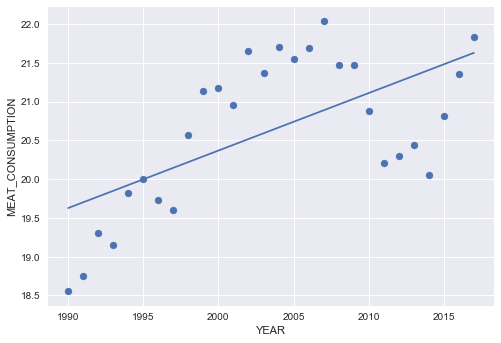

Coefficient: [[ 0.07415166]]
Coefficient of Determination 0.382595377
Correlation Coefficient: 0.618542946771


In [303]:
#creating a scatter plot of year v meat consumption
pyplot.scatter(meat_project['YEAR'], meat_project['MEAT_CONSUMPTION'])
pyplot.xlabel('YEAR')
pyplot.ylabel('MEAT_CONSUMPTION')


#creating a linear regression with just meat project data 
model = LinearRegression().fit(meat_project[['YEAR']], meat_project[['MEAT_CONSUMPTION']])

y_pred = model.predict(meat_project[['YEAR']])
pyplot.plot(meat_project['YEAR'], y_pred)

pyplot.show()
#getting significant descriptive statistics 
print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination " + str(model.score(meat_project[['YEAR']], meat_project[['MEAT_CONSUMPTION']])))

matrix = numpy.cov(meat_project['YEAR'], meat_project['MEAT_CONSUMPTION'])
pearson = matrix[1,0] / ((numpy.sqrt(matrix[0,0])) * (numpy.sqrt(matrix[1,1])))
print("Correlation Coefficient: " + str(pearson))

In [283]:
from numpy import polyfit

## GDP and Meat Consumption

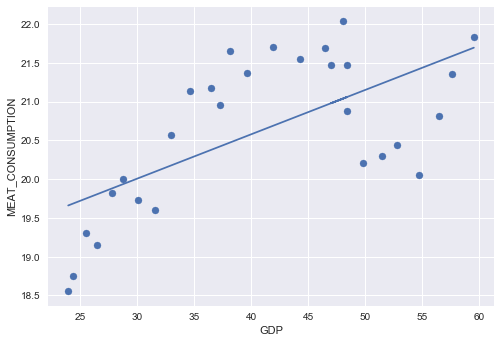

Coefficient: [[ 0.05721614]]
Coefficient of Determination 0.412206088302
Correlation Coefficient: 0.642032778215


In [304]:
#creating a scatterplot of gdp v. meat consumption
pyplot.scatter(meat_project['GDP'], meat_project['MEAT_CONSUMPTION'])
pyplot.xlabel('GDP')
pyplot.ylabel('MEAT_CONSUMPTION')

#creating a lin reg. with GDP as only factor 
model = LinearRegression().fit(meat_project[['GDP']], meat_project[['MEAT_CONSUMPTION']])
y_pred = model.predict(meat_project[['GDP']])
pyplot.plot(meat_project['GDP'], y_pred)
pyplot.show()

#getting the descriptive statistics 
print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination " + str(model.score(meat_project[['GDP']], meat_project[['MEAT_CONSUMPTION']])))

matrix = numpy.cov(meat_project['GDP'], meat_project['MEAT_CONSUMPTION'])
pearson = matrix[1,0] / ((numpy.sqrt(matrix[0,0])) * (numpy.sqrt(matrix[1,1])))
print("Correlation Coefficient: " + str(pearson))

## Vegan Trends and Meat Consumption

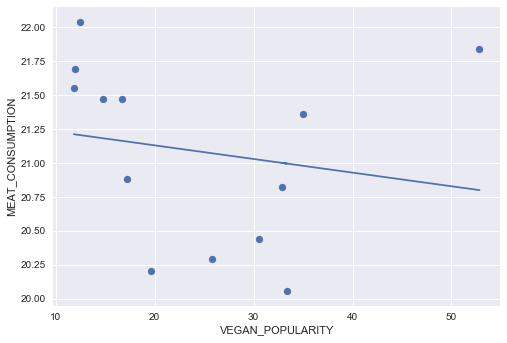

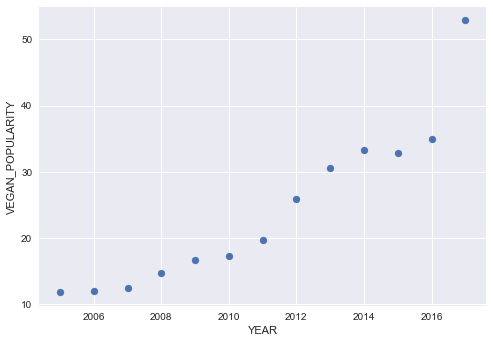

Coefficient: [[-0.0100408]]
Coefficient of Determination: 0.0334024536949
Correlation Coefficient: -0.182763381712


In [305]:
#can only use data from 2005 - on since data starts then
meat_trend = meat_project[15:]

#making a scatter plot of vegan v. meat consumption
pyplot.scatter(meat_trend['VEGAN_POPULARITY'], meat_trend['MEAT_CONSUMPTION'])
pyplot.xlabel('VEGAN_POPULARITY')
pyplot.ylabel('MEAT_CONSUMPTION')

#lin reg model with vegan as only factor 
model = LinearRegression().fit(meat_trend[['VEGAN_POPULARITY']], meat_trend[['MEAT_CONSUMPTION']])
y_pred = model.predict(meat_trend[['VEGAN_POPULARITY']])
pyplot.plot(meat_trend['VEGAN_POPULARITY'], y_pred)

pyplot.show()

#making a scatterplot of year v. vegan 
pyplot.scatter(meat_trend['YEAR'], meat_trend['VEGAN_POPULARITY'])
pyplot.xlabel('YEAR')
pyplot.ylabel('VEGAN_POPULARITY')
pyplot.show()


#getting descriptive statistics 
print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_trend[['VEGAN_POPULARITY']], meat_trend[['MEAT_CONSUMPTION']])))


matrix2 = numpy.cov(meat_trend['VEGAN_POPULARITY'].astype(float), meat_trend['MEAT_CONSUMPTION'])
pearson2 = matrix2[1,0] / ((numpy.sqrt(matrix2[0,0])) * (numpy.sqrt(matrix2[1,1])))
print("Correlation Coefficient: " + str(pearson2))

## Vegetarianism and Meat Consumption

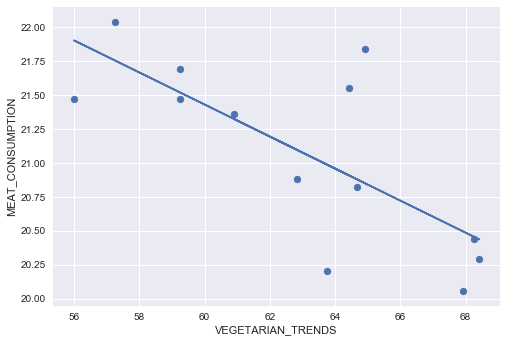

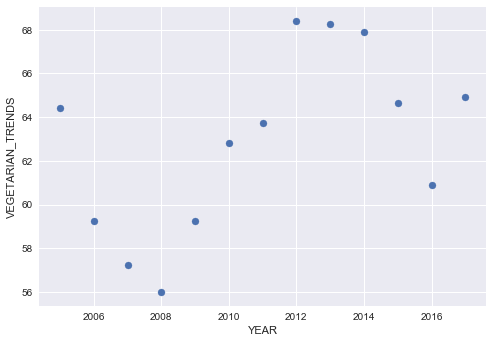

Coefficient: [[-0.11802193]]
Coefficient of Determination: 0.527312166261
Correlation Coefficient: -0.726162630725


In [306]:
#scatterplot of vegetarian v. meat consumption
pyplot.scatter(meat_trend['VEGETARIAN_TRENDS'], meat_trend['MEAT_CONSUMPTION'])
pyplot.xlabel('VEGETARIAN_TRENDS')
pyplot.ylabel('MEAT_CONSUMPTION')

#lin reg model with vegan as only factor 
model = LinearRegression().fit(meat_trend[['VEGETARIAN_TRENDS']], meat_trend[['MEAT_CONSUMPTION']])
y_pred = model.predict(meat_trend[['VEGETARIAN_TRENDS']])
pyplot.plot(meat_trend['VEGETARIAN_TRENDS'], y_pred)
pyplot.show()

#scatterplot of year v vegetarian
pyplot.scatter(meat_trend['YEAR'], meat_trend['VEGETARIAN_TRENDS'])
pyplot.xlabel('YEAR')
pyplot.ylabel('VEGETARIAN_TRENDS')
pyplot.show()

#getting descriptive statistics 
print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_trend[['VEGETARIAN_TRENDS']], meat_trend[['MEAT_CONSUMPTION']])))
matrix3 = numpy.cov(meat_trend['VEGETARIAN_TRENDS'].astype(float), meat_trend['MEAT_CONSUMPTION'])
pearson3 = matrix3[1,0] / ((numpy.sqrt(matrix3[0,0])) * (numpy.sqrt(matrix3[1,1])))
print("Correlation Coefficient: " + str(pearson3))

## Keto Diet Popularity and Meat Consumption

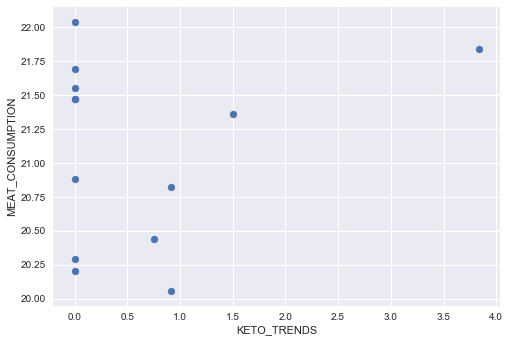

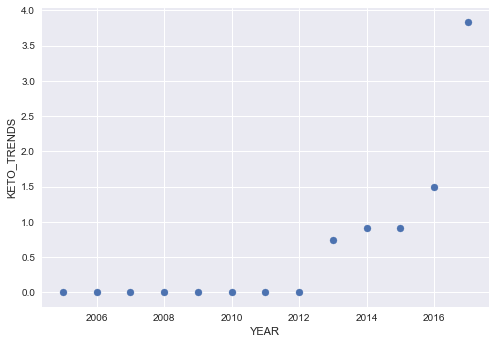

Coefficient: [[ 0.11257746]]
Coefficient of Determination: 0.0336976374955
Correlation Coefficient: 0.183569162703


,YEAR,MEAT_CONSUMPTION,GDP,TSE,UNEMPLOYMENT_RATE,INFLATION,VEGAN_POPULARITY,VEGETARIAN_TRENDS,KETO_TRENDS,GW_GREAT_DEAL,GW_FAIR,GW_LITTLE,GW_NOT_AT_ALL,GW_NO_OPINION,Obesity_Rate
0,2005,21.548133,44.307921,58.469,5.0835,3.392747,11.8333,64.4167,0,,,,,,25.4
1,2006,21.689512,46.437067,51.692,4.6230,3.225944,12,59.25,0,36,26,21,15,1,26.4
2,2007,22.035972,48.061538,48.5455,4.6221,2.852672,12.5,57.25,0,41,24,18,16,1,26.7
3,2008,21.468835,48.401427,48.8018,5.7842,3.839100,14.75,56,0,37,29,16,17,1,27.6
4,2009,21.471745,47.001555,54.6094,9.2542,-0.355546,16.75,59.25,0,34,26,20,20,1,28
5,2010,20.882479,48.375407,61.7052,9.6334,1.640043,17.25,62.8333,0,28,24,19,29,0,28.4
6,2011,20.203967,49.793714,60.2613,8.9492,3.156842,19.6667,63.75,0,25,26,20,28,1,28.7
7,2012,20.293591,51.450959,69.4283,7.9013,2.069337,25.8333,68.4167,0,30,25,22,23,1,28.9
8,2013,20.439815,52.782087,66.1435,7.3749,1.464833,30.5833,68.25,0.75,33,25,20,23,0,29
9,2014,20.058076,54.696726,74.0436,6.1675,1.622223,33.3333,67.9167,0.916667,34,22,19,24,0,29.9


In [347]:
#keto and meat
pyplot.scatter(meat_trend['KETO_TRENDS'], meat_trend['MEAT_CONSUMPTION'])
pyplot.xlabel('KETO_TRENDS')
pyplot.ylabel('MEAT_CONSUMPTION')

pyplot.show()

pyplot.scatter(meat_trend['YEAR'], meat_trend['KETO_TRENDS'])
pyplot.xlabel('YEAR')
pyplot.ylabel('KETO_TRENDS')
pyplot.show()

model = LinearRegression().fit(meat_trend[['KETO_TRENDS']], meat_trend[['MEAT_CONSUMPTION']])
print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_trend[['KETO_TRENDS']], meat_trend[['MEAT_CONSUMPTION']])))
matrix5 = numpy.cov(meat_trend['KETO_TRENDS'].astype(float), meat_trend['MEAT_CONSUMPTION'])
pearson5 = matrix5[1,0] / ((numpy.sqrt(matrix5[0,0])) * (numpy.sqrt(matrix5[1,1])))
print("Correlation Coefficient: " + str(pearson5))
meat_trend2

## TSE and Meat Consumption

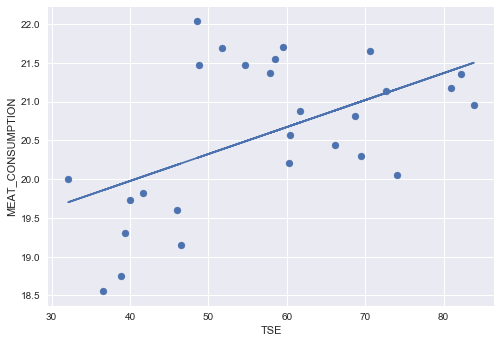

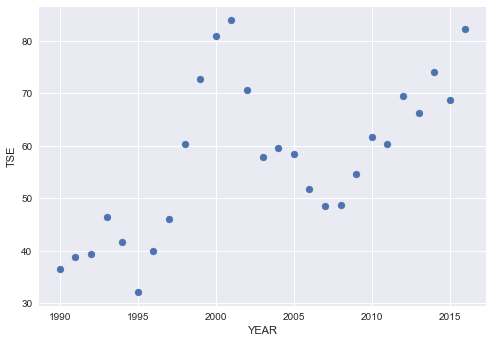

Coefficient: [[ 0.03479721]]
Coefficient of Determination: 0.27784046257
Correlation Coefficient: 0.527105741355


In [308]:
#meat and tse
meat_support = meat_project[:-1]
pyplot.scatter(meat_support['TSE'], meat_support['MEAT_CONSUMPTION'])
pyplot.xlabel('TSE')
pyplot.ylabel('MEAT_CONSUMPTION')

model = LinearRegression().fit(meat_support[['TSE']], meat_support[['MEAT_CONSUMPTION']])
y_pred = model.predict(meat_support[['TSE']])
pyplot.plot(meat_support['TSE'], y_pred)

pyplot.show()

pyplot.scatter(meat_support['YEAR'], meat_support['TSE'])
pyplot.xlabel('YEAR')
pyplot.ylabel('TSE')
pyplot.show()

print("Coefficient: " + str(model.coef_))
matrix6 = numpy.cov(meat_support['TSE'].astype(float), meat_support['MEAT_CONSUMPTION'])
pearson6 = matrix6[1,0] / ((numpy.sqrt(matrix6[0,0])) * (numpy.sqrt(matrix6[1,1])))
# used cor. coefficient squared here since score gave an incorrect answer for coefficient of determination
print("Coefficient of Determination: " + str(pearson6**2))
print("Correlation Coefficient: " + str(pearson6))

## Unemployment and Meat Consumption

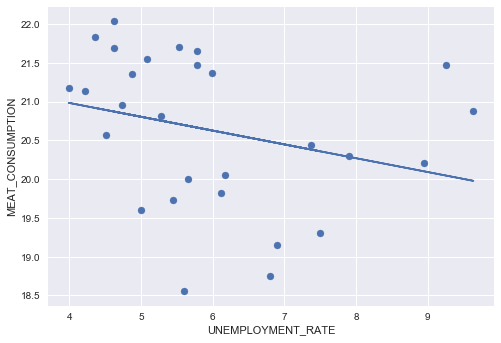

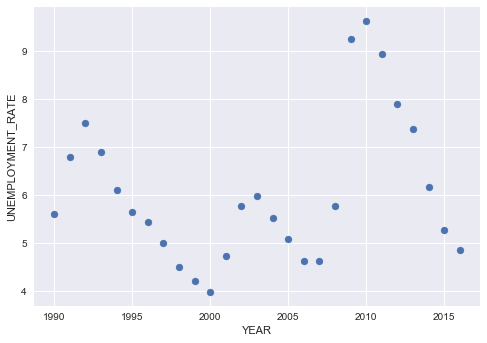

Coefficient: [[-0.17839135]]
Coefficient of Determination: 0.0773284746618
Correlation Coefficient: -0.278079978894


In [310]:
#meat and unemployment
pyplot.scatter(meat_project['UNEMPLOYMENT_RATE'], meat_project['MEAT_CONSUMPTION'])
pyplot.xlabel('UNEMPLOYMENT_RATE')
pyplot.ylabel('MEAT_CONSUMPTION')

model = LinearRegression().fit(meat_project[['UNEMPLOYMENT_RATE']], meat_project[['MEAT_CONSUMPTION']])
y_pred = model.predict(meat_project[['UNEMPLOYMENT_RATE']])
pyplot.plot(meat_project['UNEMPLOYMENT_RATE'], y_pred)

pyplot.show()

pyplot.scatter(meat_support['YEAR'], meat_support['UNEMPLOYMENT_RATE'])
pyplot.xlabel('YEAR')
pyplot.ylabel('UNEMPLOYMENT_RATE')
pyplot.show()

print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_project[['UNEMPLOYMENT_RATE']], meat_project[['MEAT_CONSUMPTION']])))
matrix7 = numpy.cov(meat_project['UNEMPLOYMENT_RATE'], meat_project['MEAT_CONSUMPTION'])
pearson7 = matrix7[1,0] / ((numpy.sqrt(matrix7[0,0])) * (numpy.sqrt(matrix7[1,1])))
print("Correlation Coefficient: " + str(pearson7))

## Inflation Rate and Unemployment

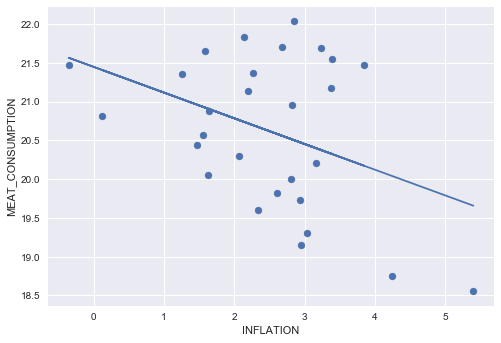

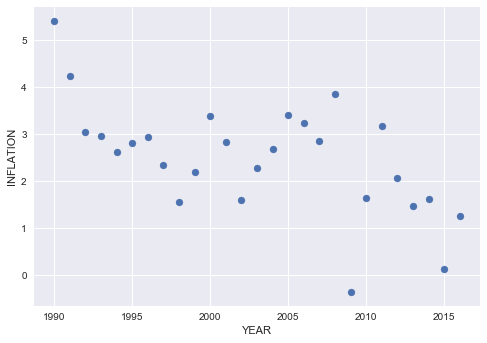

Coefficient: [[-0.33174217]]
Coefficient of Determination: 0.15471187656
Correlation Coefficient: -0.39333430636


In [311]:
#meat and inflation
pyplot.scatter(meat_project['INFLATION'], meat_project['MEAT_CONSUMPTION'])
pyplot.xlabel('INFLATION')
pyplot.ylabel('MEAT_CONSUMPTION')

model = LinearRegression().fit(meat_project[['INFLATION']], meat_project[['MEAT_CONSUMPTION']])
y_pred = model.predict(meat_project[['INFLATION']])
pyplot.plot(meat_project['INFLATION'], y_pred)

pyplot.show()

pyplot.scatter(meat_support['YEAR'], meat_support['INFLATION'])
pyplot.xlabel('YEAR')
pyplot.ylabel('INFLATION')
pyplot.show()


print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_project[['INFLATION']], meat_project[['MEAT_CONSUMPTION']])))
matrix8 = numpy.cov(meat_project['INFLATION'], meat_project['MEAT_CONSUMPTION'])
pearson8 = matrix8[1,0] / ((numpy.sqrt(matrix8[0,0])) * (numpy.sqrt(matrix8[1,1])))
print("Correlation Coefficient: " + str(pearson8))

## Obesity Rate and Meat Consumption

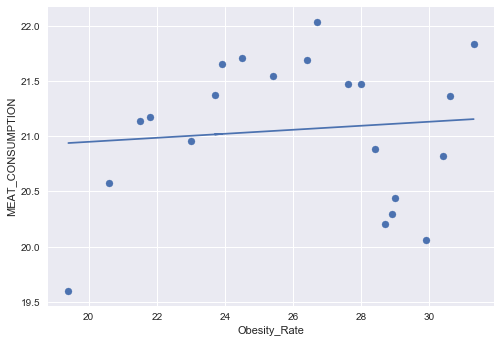

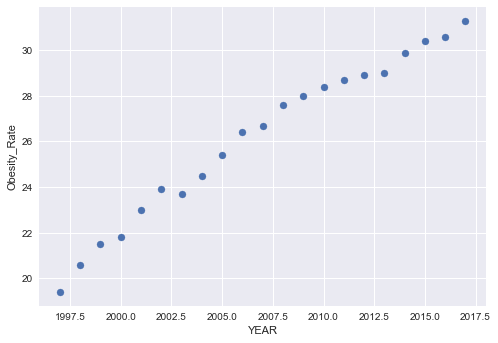

Coefficient: [[ 0.01817316]]
Coefficient of Determination: 0.00962538830559
Correlation Coefficient: 0.0981090633203


In [296]:
#meat and obesity
meat_obesity = meat_project[7:]
pyplot.scatter(meat_obesity['Obesity_Rate'], meat_obesity['MEAT_CONSUMPTION'])
pyplot.xlabel('Obesity_Rate')
pyplot.ylabel('MEAT_CONSUMPTION')

model = LinearRegression().fit(meat_obesity[['Obesity_Rate']], meat_obesity[['MEAT_CONSUMPTION']])
y_pred = model.predict(meat_obesity[['Obesity_Rate']])
pyplot.plot(meat_obesity['Obesity_Rate'], y_pred)



pyplot.show()



pyplot.scatter(meat_obesity['YEAR'], meat_obesity['Obesity_Rate'])
pyplot.xlabel('YEAR')
pyplot.ylabel('Obesity_Rate')

pyplot.show()


print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_obesity[['Obesity_Rate']], meat_obesity[['MEAT_CONSUMPTION']])))
matrix9 = numpy.cov(meat_obesity['Obesity_Rate'].astype(float), meat_obesity['MEAT_CONSUMPTION'])
pearson9 = matrix9[1,0] / ((numpy.sqrt(matrix9[0,0])) * (numpy.sqrt(matrix9[1,1])))
print("Correlation Coefficient: " + str(pearson9))

## Opinion on Climate Change and Meat Consumption

In [312]:
# dropping the empty rows
meat_climate = meat_project.drop([15])
meat_gw = meat_climate[9:]

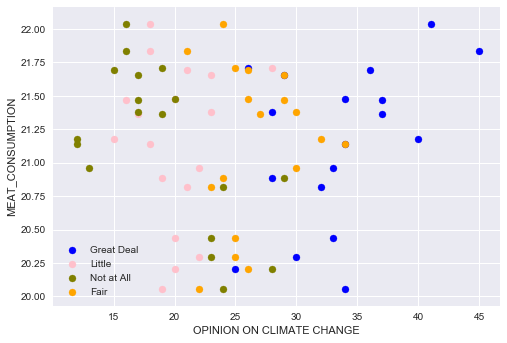

In [313]:
pyplot.scatter(meat_gw['GW_GREAT_DEAL'].astype(float), meat_gw['MEAT_CONSUMPTION'], color="blue", label="Great Deal")
pyplot.scatter(meat_gw['GW_LITTLE'].astype(float), meat_gw['MEAT_CONSUMPTION'], color="pink", label="Little")
pyplot.scatter(meat_gw['GW_NOT_AT_ALL'].astype(float), meat_gw['MEAT_CONSUMPTION'], color="olive", label="Not at All")
pyplot.scatter(meat_gw['GW_FAIR'].astype(float), meat_gw['MEAT_CONSUMPTION'], color="orange", label="Fair")
pyplot.xlabel('OPINION ON CLIMATE CHANGE')
pyplot.ylabel('MEAT_CONSUMPTION')
pyplot.legend()

pyplot.show()

### Cares about Climate Change a "Great Deal"

In [314]:
model = LinearRegression().fit(meat_gw[['GW_GREAT_DEAL']], meat_gw[['MEAT_CONSUMPTION']])

print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_gw[['GW_GREAT_DEAL']], meat_gw[['MEAT_CONSUMPTION']])))
matrix10 = numpy.cov(meat_gw['GW_GREAT_DEAL'].astype(float), meat_gw['MEAT_CONSUMPTION'])
pearson10 = matrix10[1,0] / ((numpy.sqrt(matrix10[0,0])) * (numpy.sqrt(matrix10[1,1])))
print("Correlation Coefficient: " + str(pearson10))

Coefficient: [[ 0.04782637]]
Coefficient of Determination: 0.187095074681
Correlation Coefficient: 0.432544881695


### Cares about Climate Change "Fair"

In [315]:
#fair and meat 
model = LinearRegression().fit(meat_gw[['GW_FAIR']], meat_gw[['MEAT_CONSUMPTION']])

print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_gw[['GW_FAIR']], meat_gw[['MEAT_CONSUMPTION']])))
matrix11 = numpy.cov(meat_gw['GW_FAIR'].astype(float), meat_gw['MEAT_CONSUMPTION'])
pearson11 = matrix11[1,0] / ((numpy.sqrt(matrix11[0,0])) * (numpy.sqrt(matrix11[1,1])))
print("Correlation Coefficient: " + str(pearson11))

Coefficient: [[ 0.02253472]]
Coefficient of Determination: 0.0176279486185
Correlation Coefficient: 0.132770285149


### Cares about Climate Change "Not At All"

In [316]:
model = LinearRegression().fit(meat_gw[['GW_NOT_AT_ALL']], meat_gw[['MEAT_CONSUMPTION']])

print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_gw[['GW_NOT_AT_ALL']], meat_gw[['MEAT_CONSUMPTION']])))
matrix12 = numpy.cov(meat_gw['GW_NOT_AT_ALL'].astype(float), meat_gw['MEAT_CONSUMPTION'])
pearson12 = matrix12[1,0] / ((numpy.sqrt(matrix12[0,0])) * (numpy.sqrt(matrix12[1,1])))
print("Correlation Coefficient: " + str(pearson12))

Coefficient: [[-0.0724354]]
Coefficient of Determination: 0.39152690888
Correlation Coefficient: -0.625721111103


## Cares About Climate Change "Little" 

In [317]:
#little and meat 
model = LinearRegression().fit(meat_gw[['GW_LITTLE']], meat_gw[['MEAT_CONSUMPTION']])

print("Coefficient: " + str(model.coef_))
print("Coefficient of Determination: " + str(model.score(meat_gw[['GW_LITTLE']], meat_gw[['MEAT_CONSUMPTION']])))
matrix13 = numpy.cov(meat_gw['GW_LITTLE'].astype(float), meat_gw['MEAT_CONSUMPTION'])
pearson13 = matrix13[1,0] / ((numpy.sqrt(matrix13[0,0])) * (numpy.sqrt(matrix13[1,1])))
print("Correlation Coefficient: " + str(pearson13))

Coefficient: [[ 0.00617417]]
Coefficient of Determination: 0.00099994519422
Correlation Coefficient: 0.0316219100344


In [318]:
meat_no_missing = meat_gw[6:-1]

In [319]:
meat_no_missing

,YEAR,MEAT_CONSUMPTION,GDP,TSE,UNEMPLOYMENT_RATE,INFLATION,VEGAN_POPULARITY,VEGETARIAN_TRENDS,KETO_TRENDS,GW_GREAT_DEAL,GW_FAIR,GW_LITTLE,GW_NOT_AT_ALL,GW_NO_OPINION,Obesity_Rate
16,2006,21.689512,46.437067,51.692,4.6230,3.225944,12,59.25,0,36,26,21,15,1,26.4
17,2007,22.035972,48.061538,48.5455,4.6221,2.852672,12.5,57.25,0,41,24,18,16,1,26.7
18,2008,21.468835,48.401427,48.8018,5.7842,3.839100,14.75,56,0,37,29,16,17,1,27.6
19,2009,21.471745,47.001555,54.6094,9.2542,-0.355546,16.75,59.25,0,34,26,20,20,1,28
20,2010,20.882479,48.375407,61.7052,9.6334,1.640043,17.25,62.8333,0,28,24,19,29,0,28.4
21,2011,20.203967,49.793714,60.2613,8.9492,3.156842,19.6667,63.75,0,25,26,20,28,1,28.7
22,2012,20.293591,51.450959,69.4283,7.9013,2.069337,25.8333,68.4167,0,30,25,22,23,1,28.9
23,2013,20.439815,52.782087,66.1435,7.3749,1.464833,30.5833,68.25,0.75,33,25,20,23,0,29
24,2014,20.058076,54.696726,74.0436,6.1675,1.622223,33.3333,67.9167,0.916667,34,22,19,24,0,29.9
25,2015,20.820417,56.443817,68.7426,5.2800,0.118627,32.8333,64.6667,0.916667,32,23,21,24,0,30.4


# Part 3: Permutation Testing

## Generating a Random Linear Model

In [320]:
import numpy
from matplotlib import pyplot
from scipy.stats import t

In [321]:
pyplot.style.use("seaborn")

In [322]:
# referenced notes from 03/28/19 
def make_linear_model(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    sum_x_squared = numpy.sum((x - x_mean)**2)
    sum_y_squared = numpy.sum((y - y_mean)**2)
    sum_x_y = numpy.sum((x - x_mean) * (y - y_mean))
    
    slope = sum_x_y / sum_x_squared
    intercept = y_mean - x_mean * slope

    predictions = x * slope + intercept
    sum_squared_error = numpy.sum((y - predictions)**2)
    standard_error = numpy.sqrt(sum_squared_error / ((len(x) - 2) * sum_x_squared))
    
    return { "slope": slope, "intercept": intercept, "standard_error": standard_error }

def predict_model(x, mod):
    return x * mod["slope"] + mod["intercept"]

# Testing Significance

## Test Significance of GDP

In [323]:
def perm(k):
    perm_k = k.copy()
    numpy.random.shuffle(perm_k)
    return perm_k

{'slope': 0.05721613643092973, 'intercept': 18.289657327428547, 'standard_error': 0.013399456866671822}


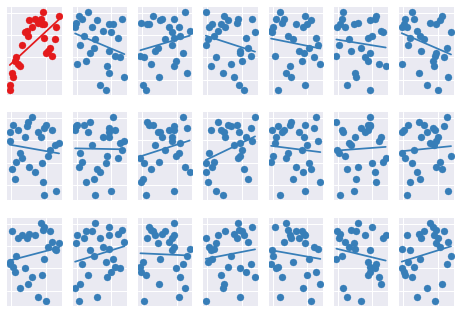

0.0 0.00136202630564


In [324]:
# test significance of GDP 
real_model = make_linear_model(meat_project["GDP"], meat_project["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_project["GDP"].min(), meat_project["GDP"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_project["GDP"], meat_project["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_project["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_project["GDP"], fake_y)
        pyplot.scatter(meat_project["GDP"], fake_y, color=initial(1))
        if fake_model["slope"] > real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_project["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_project["GDP"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

#what does second number mean ????
print((steeper_slopes / 2) / 1000, 1 - t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Significance of TSE

{'slope': 0.03479721127227808, 'intercept': 18.584408368264491, 'standard_error': 0.01122001053285712}


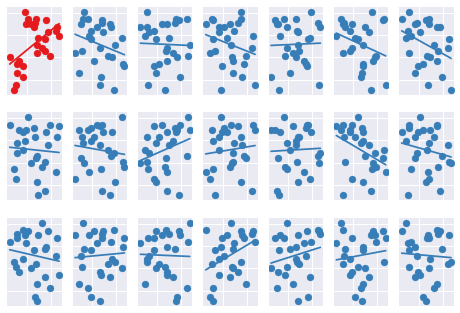

0.002 0.00731788082065


In [325]:
# test significance of TSE

real_model = make_linear_model(meat_support["TSE"], meat_support["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_support["TSE"].min(), meat_support["TSE"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_support["TSE"], meat_support["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_support["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_support["TSE"], fake_y)
        pyplot.scatter(meat_support["TSE"], fake_y, color=initial(1))
        if fake_model["slope"] > real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_support["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_support["TSE"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

print((steeper_slopes / 2) / 1000, 1 - t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Significance of Unemployment

{'slope': -0.1783913496280287, 'intercept': 21.69651505326462, 'standard_error': 0.12084841378998468}


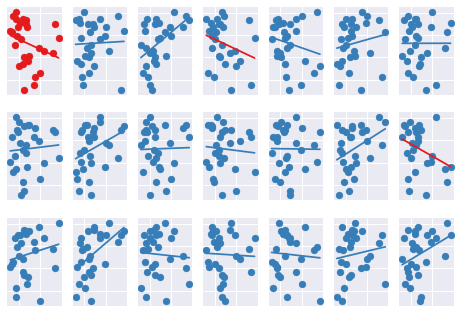

0.0795 0.0890719392102


In [326]:
# test significance of Unemployment
real_model = make_linear_model(meat_project["UNEMPLOYMENT_RATE"], meat_project["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_project["UNEMPLOYMENT_RATE"].min(), meat_project["UNEMPLOYMENT_RATE"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_project["UNEMPLOYMENT_RATE"], meat_project["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_project["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_project["UNEMPLOYMENT_RATE"], fake_y)
        pyplot.scatter(meat_project["UNEMPLOYMENT_RATE"], fake_y, color=initial(1))
        if fake_model["slope"] < real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_project["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_project["UNEMPLOYMENT_RATE"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

print((steeper_slopes / 2) / 1000,  1-t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Significance of Inflation Rate

{'slope': -0.3317421690323353, 'intercept': 21.44802407672457, 'standard_error': 0.15207385753414512}


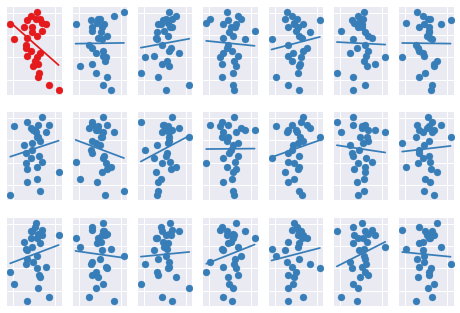

0.0165 0.0303623190589


In [327]:
# test significance of price stability
real_model = make_linear_model(meat_project["INFLATION"], meat_project["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_project["INFLATION"].min(), meat_project["INFLATION"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_project["INFLATION"], meat_project["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_project["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_project["INFLATION"], fake_y)
        pyplot.scatter(meat_project["INFLATION"], fake_y, color=initial(1))
        if fake_model["slope"] < real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_project["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_project["INFLATION"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

print((steeper_slopes / 2) / 1000,  1-t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Significance for Obesity

In [328]:
meat_obesity = meat_obesity.reset_index(drop=True)

{'slope': 0.018173163733811549, 'intercept': 20.585680290877654, 'standard_error': 0.042290649872225923}


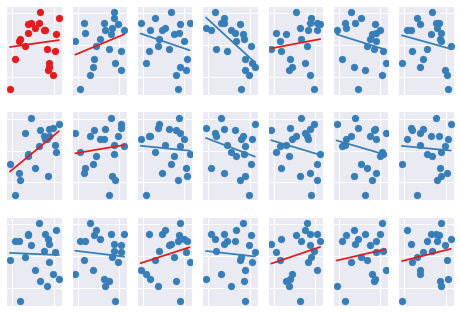

0.3325 0.339369416107


In [329]:
#test significance of obesity
real_model = make_linear_model(meat_obesity["Obesity_Rate"], meat_obesity["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_obesity["Obesity_Rate"].min(), meat_obesity["Obesity_Rate"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_obesity["Obesity_Rate"], meat_obesity["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_obesity["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_obesity["Obesity_Rate"], fake_y)
        pyplot.scatter(meat_obesity["Obesity_Rate"], fake_y, color=initial(1))
        if fake_model["slope"] > real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_obesity["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_obesity["Obesity_Rate"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

#what does second number mean ????
print((steeper_slopes / 2) / 1000, 1 - t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Signficance for Opinion on Climate Change: Great Deal

In [330]:
meat_gw = meat_gw.reset_index(drop=True)

{'slope': 0.04782636832596023, 'intercept': 19.543007260575497, 'standard_error': 0.02492275871243789}


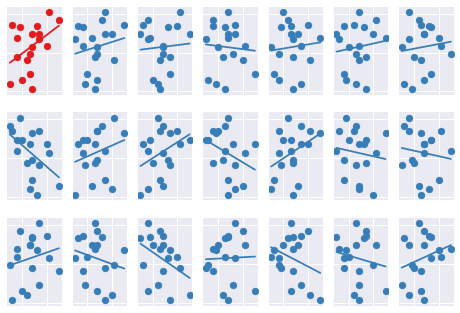

0.0365 0.0456292283541


In [331]:
# test significance of GW_Great_Deal
real_model = make_linear_model(meat_gw["GW_GREAT_DEAL"], meat_gw["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_gw["GW_GREAT_DEAL"].min(), meat_gw["GW_GREAT_DEAL"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_gw["GW_GREAT_DEAL"], meat_gw["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_gw["GW_GREAT_DEAL"], fake_y)
        pyplot.scatter(meat_gw["GW_GREAT_DEAL"], fake_y, color=initial(1))
        if fake_model["slope"] > real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_gw["GW_GREAT_DEAL"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

#what does second number mean ????
print((steeper_slopes / 2) / 1000, 1 - t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Signficance for Opinion on Climate Change: Fair

{'slope': 0.022534718565143205, 'intercept': 20.544111608247142, 'standard_error': 0.042056125342424484}


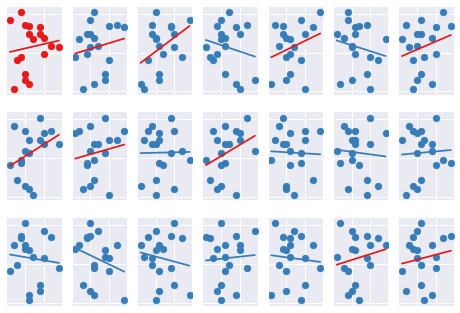

0.297 0.303325700796


In [332]:
# test significance of GW_Fair
real_model = make_linear_model(meat_gw["GW_FAIR"], meat_gw["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_gw["GW_FAIR"].min(), meat_gw["GW_FAIR"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_gw["GW_FAIR"], meat_gw["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_gw["GW_FAIR"], fake_y)
        pyplot.scatter(meat_gw["GW_FAIR"], fake_y, color=initial(1))
        if fake_model["slope"] > real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_gw["GW_FAIR"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

#what does second number mean ????
print((steeper_slopes / 2) / 1000, 1 - t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Signficance for Opinion on Climate Change: Little

{'slope': 0.006174170953294869, 'intercept': 21.019050159966714, 'standard_error': 0.048788033820788231}


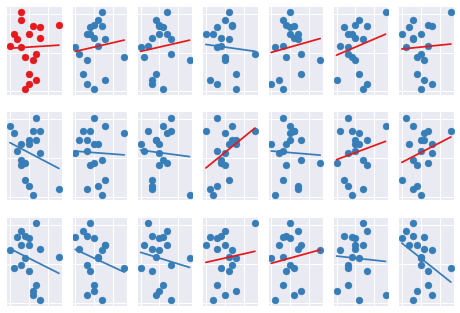

0.4475 0.451209346417


In [333]:
# test significance of GW_Fair
real_model = make_linear_model(meat_gw["GW_LITTLE"], meat_gw["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_gw["GW_LITTLE"].min(), meat_gw["GW_LITTLE"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_gw["GW_LITTLE"], meat_gw["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_gw["GW_LITTLE"], fake_y)
        pyplot.scatter(meat_gw["GW_LITTLE"], fake_y, color=initial(1))
        if fake_model["slope"] > real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_gw["GW_LITTLE"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

#what does second number mean ????
print((steeper_slopes / 2) / 1000, 1 - t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Signficance for Opinion on Climate Change: Not At All

{'slope': -0.07243540337696895, 'intercept': 22.526854621348019, 'standard_error': 0.022575156633617414}


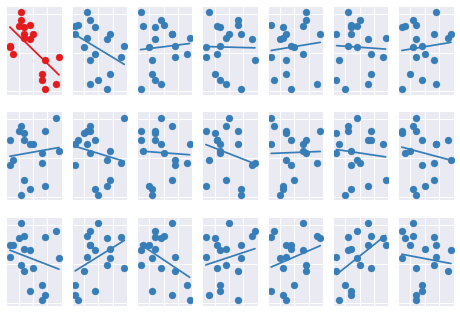

0.004 0.00622491118931


In [334]:
# test significance of GW_Not_At_All
real_model = make_linear_model(meat_gw["GW_NOT_AT_ALL"], meat_gw["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_gw["GW_NOT_AT_ALL"].min(), meat_gw["GW_NOT_AT_ALL"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_gw["GW_NOT_AT_ALL"], meat_gw["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_gw["GW_NOT_AT_ALL"], fake_y)
        pyplot.scatter(meat_gw["GW_NOT_AT_ALL"], fake_y, color=initial(1))
        if fake_model["slope"] < real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_gw["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_gw["GW_NOT_AT_ALL"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

#what does second number mean ????
print((steeper_slopes / 2) / 1000, 1 - t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Significance for Vegetarian Trends

In [335]:
meat_trend = meat_trend.reset_index(drop=True)

{'slope': -0.1180219256574261, 'intercept': 28.509928846683277, 'standard_error': 0.033691447500495783}


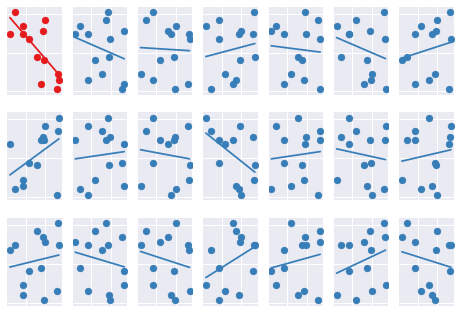

0.003 0.00402168340668


In [336]:
# test significance of "VEGETARIAN_TRENDS"
real_model = make_linear_model(meat_trend["VEGETARIAN_TRENDS"], meat_trend["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_trend["VEGETARIAN_TRENDS"].min(), meat_trend["VEGETARIAN_TRENDS"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_trend["VEGETARIAN_TRENDS"], meat_trend["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_trend["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_trend["VEGETARIAN_TRENDS"], fake_y)
        pyplot.scatter(meat_trend["VEGETARIAN_TRENDS"], fake_y, color=initial(1))
        if fake_model["slope"] < real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_trend["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_trend["VEGETARIAN_TRENDS"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

print((steeper_slopes / 2) / 1000,  1-t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Significance for Vegan Trends

{'slope': -0.010040796740897976, 'intercept': 21.328564198427486, 'standard_error': 0.016285664808192487}


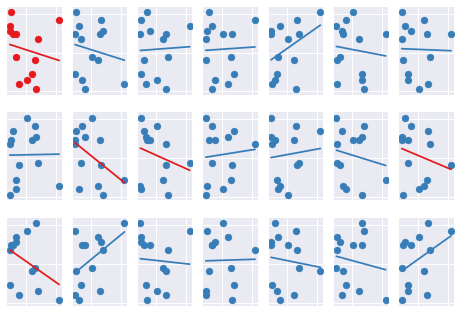

0.282 0.277335866069


In [337]:
# test significance of Vegan trends
real_model = make_linear_model(meat_trend["VEGAN_POPULARITY"], meat_trend["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_trend["VEGAN_POPULARITY"].min(), meat_trend["VEGAN_POPULARITY"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_trend["VEGAN_POPULARITY"], meat_trend["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_trend["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_trend["VEGAN_POPULARITY"], fake_y)
        pyplot.scatter(meat_trend["VEGAN_POPULARITY"], fake_y, color=initial(1))
        if fake_model["slope"] < real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_trend["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_trend["VEGAN_POPULARITY"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]

print((steeper_slopes / 2) / 1000,  1-t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Test Significance for Keto Trends

{'slope': 0.1125774610694719, 'intercept': 21.01658245435264, 'standard_error': 0.1817656864706913}


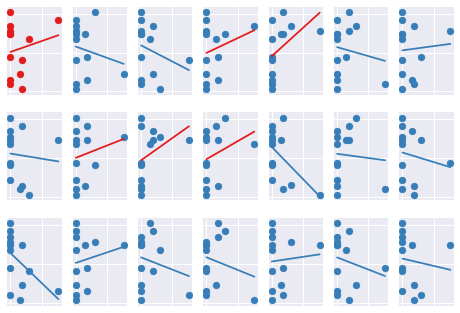

0.3035 0.276454025043


In [338]:
# test significance of Keto trends
real_model = make_linear_model(meat_trend["KETO_TRENDS"], meat_trend["MEAT_CONSUMPTION"])
print(real_model)
gdp_range = numpy.array([meat_trend["KETO_TRENDS"].min(), meat_trend["KETO_TRENDS"].max()])

initial = pyplot.get_cmap("Set1")

# plotting the random sets to gauge significance
for spot in range(1, 22):
    pyplot.subplot(3,7, spot)
    
    if spot == 1:
        pyplot.scatter(meat_trend["KETO_TRENDS"], meat_trend["MEAT_CONSUMPTION"], color=initial(0))
        pyplot.plot( gdp_range, predict_model(gdp_range, real_model), color=initial(0) )
    else:
        fake_y = perm(meat_trend["MEAT_CONSUMPTION"])
        fake_model = make_linear_model(meat_trend["KETO_TRENDS"], fake_y)
        pyplot.scatter(meat_trend["KETO_TRENDS"], fake_y, color=initial(1))
        if fake_model["slope"] > real_model["slope"]:
            color = initial(0)
        else:
            color = initial(1)
        pyplot.plot( gdp_range, predict_model(gdp_range, fake_model), color=color )
    pyplot.tick_params(labelbottom=False)
    pyplot.tick_params(labelleft=False)


pyplot.show()

fake_slopes = numpy.zeros(1000)

steeper_slopes = 0

for i in range(1000):
    fake_y = perm(meat_trend["MEAT_CONSUMPTION"])
    fake_model = make_linear_model(meat_trend["KETO_TRENDS"], fake_y)
    
    if numpy.abs(fake_model["slope"]) > numpy.abs(real_model["slope"]):
        steeper_slopes += 1
    
    fake_slopes[i] = fake_model["slope"] / fake_model["standard_error"]
print((steeper_slopes / 2) / 1000,  1-t.cdf(numpy.abs(real_model["slope"]) / real_model["standard_error"], df=8))

## Linear Regression with Significant Variables

In [339]:
model = LinearRegression().fit(meat_no_missing[['GDP', 'TSE', 'INFLATION', 'VEGETARIAN_TRENDS','GW_NOT_AT_ALL']], meat_no_missing[['MEAT_CONSUMPTION']])
print("Coefficient: " + str(model.coef_))

Coefficient: [[-0.01752904  0.00259907 -0.10969436 -0.10355212 -0.05652226]]
